# Loading Dependencies

In [1]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

# Loading Dataset

In [2]:
customer_segment_data=pd.read_excel('Online Retail.xlsx')

In [3]:
customer_segment_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
customer_segment_data.shape

(541909, 8)

# Exploratory Data Analysis

In [5]:
customer_segment_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
customer_segment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Number of Unique Stock Items

In [7]:
customer_segment_data.StockCode.unique().shape

(4070,)

Number of Unique Stock Description

In [8]:
customer_segment_data.Description.unique().shape

(4224,)

Stocks with Multiple Description

In [9]:
stock_data = customer_segment_data.groupby(["StockCode","Description"]).count().reset_index()

In [10]:
stock_data.StockCode.value_counts()[stock_data.StockCode.value_counts()>1].reset_index().head(10)

,index,StockCode
0,20713,8
1,23084,7
2,85175,6
3,21830,6
4,23131,5
5,85172,5
6,23343,5
7,72807A,5
8,21181,5
9,21621,4


Example of Stock having multiple description

In [11]:
customer_segment_data[customer_segment_data['StockCode'] == stock_data.StockCode.value_counts()
                      [stock_data.StockCode.value_counts()>1].reset_index()['index'][5]]['Description'].unique()

array(['HYACINTH BULB T-LIGHT CANDLES', 'Dotcom set',
       'wrongly sold as sets', '?sold as sets?', 'check'], dtype=object)

Sales By Country

In [12]:
customer_segment_data.Country.value_counts().reset_index()

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [13]:
customer_segment_data.CustomerID.unique().shape

(4373,)

In [14]:
(customer_segment_data.CustomerID.value_counts()/sum(customer_segment_data.CustomerID.value_counts())*100).cumsum().head(15)

17841.0     1.962249
14911.0     3.413228
14096.0     4.673708
12748.0     5.814728
14606.0     6.498553
15311.0     7.110850
14646.0     7.623350
13089.0     8.079807
13263.0     8.492020
14298.0     8.895138
15039.0     9.265809
14156.0     9.614850
18118.0     9.930462
14159.0    10.228376
14796.0    10.514737
Name: CustomerID, dtype: float64

Top 15 customers contributing to 10.5% of Total Sales

# Data Processing

In [15]:
customer_segment_data['invdatetime'] = pd.to_datetime(customer_segment_data.InvoiceDate)

In [16]:
customer_segment_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invdatetime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [17]:
customer_segment_data[customer_segment_data.Description.isnull()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invdatetime
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,2010-12-01 11:52:00
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,2010-12-01 14:32:00
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,2010-12-01 14:33:00
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,2010-12-01 14:33:00
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,2010-12-01 14:34:00
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,2010-12-01 14:34:00
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,2010-12-01 14:34:00
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom,2010-12-01 14:35:00
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,2010-12-01 14:35:00
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,2010-12-01 16:50:00


In [18]:
customer_segment_data[customer_segment_data.CustomerID.isnull()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invdatetime
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,2010-12-01 11:52:00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010-12-01 14:32:00
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12-01 14:32:00
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12-01 14:32:00
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00


In [19]:
customer_segment_data[customer_segment_data.InvoiceNo==536544]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invdatetime
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010-12-01 14:32:00
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12-01 14:32:00
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12-01 14:32:00
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00


In [20]:
len(customer_segment_data[customer_segment_data.InvoiceNo==536544].CustomerID)

527

# Focussing on UK Customers (The largest segment)

In [21]:
cust_uk=customer_segment_data[customer_segment_data.Country=='United Kingdom']

In [22]:
cust_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invdatetime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [23]:
cust_uk[cust_uk.CustomerID.isnull()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invdatetime
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,2010-12-01 11:52:00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010-12-01 14:32:00
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12-01 14:32:00
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12-01 14:32:00
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01 14:32:00
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,2010-12-01 14:32:00


In [24]:
len(cust_uk[cust_uk.CustomerID.isnull()==True].Country)

133600

In [25]:
cust_uk[cust_uk.CustomerID.isnull()==True].InvoiceNo.unique().shape

(3637,)

In [26]:
#calculate Total Amount
cust_uk['amount'] = cust_uk.Quantity*cust_uk.UnitPrice

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
cust_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invdatetime,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


In [28]:
#Removing Negative/returned items
cust_uk=cust_uk[cust_uk['amount']>0]

In [29]:
cust_uk.groupby(["CustomerID"]).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invdatetime,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,54.08
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01 08:34:00,12.60
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01 08:34:00,12.60
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,2010-12-01 08:34:00,30.00
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom,2010-12-01 08:34:00,9.90


In [30]:
cust_uk=cust_uk[~(cust_uk.CustomerID.isnull())]

# Recency Feature

In [31]:
#setting up the reference date as one day after the last transaction date
reference_date=cust_uk.InvoiceDate.max()
reference_date=reference_date+datetime.timedelta(1)

In [32]:
cust_uk['days_since_last_purchased']=reference_date-cust_uk.InvoiceDate
cust_uk['days_since_last_purchase_num'] = cust_uk['days_since_last_purchased'].astype('timedelta64[D]')

In [33]:
cust_hist = cust_uk.groupby("CustomerID").min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
cust_hist.rename(columns={'days_since_last_purchase_num':'recency'}, inplace=True)
cust_hist.recency.describe()

count    3920.000000
mean       92.208418
std        99.533854
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: recency, dtype: float64

In [34]:
cust_hist.head()

,CustomerID,recency
0,12346.0,326.0
1,12747.0,2.0
2,12748.0,1.0
3,12749.0,4.0
4,12820.0,3.0


In [35]:
cust_hist.describe()

,CustomerID,recency
count,3920.000000,3920.000000
mean,15562.059694,92.208418
std,1576.594671,99.533854
min,12346.000000,1.000000
25%,14208.750000,18.000000
50%,15569.500000,51.000000
75%,16913.250000,143.000000
max,18287.000000,374.000000


Distribution of Customer Recency

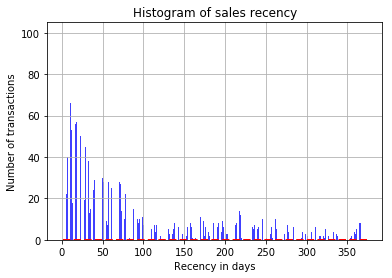

In [36]:
r = cust_hist.recency
m = np.mean(cust_hist.recency)
stdev = math.sqrt(np.var(cust_hist.recency))
n, bins, patches = plt.hist(r, 1000, facecolor='blue', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf(bins, m, stdev)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Histogram of sales recency')
plt.grid(True)

# Frequency and Monetary Values

In [37]:
customer_val = cust_uk[['CustomerID', 'amount']].groupby("CustomerID").sum().reset_index()
cust_hist = cust_hist.merge(customer_val, how='outer')
cust_hist.amount = cust_hist.amount+0.001
customer_freq = cust_uk[['CustomerID', 'amount']].groupby("CustomerID").count().reset_index()
customer_freq.rename(columns={'amount':'frequency'},inplace=True)
cust_hist = cust_hist.merge(customer_freq, how='outer')

In [38]:
cust_hist.head()

,CustomerID,recency,amount,frequency
0,12346.0,326.0,77183.601,1
1,12747.0,2.0,4196.011,103
2,12748.0,1.0,33719.731,4595
3,12749.0,4.0,4090.881,199
4,12820.0,3.0,942.341,59


In [39]:
from sklearn import preprocessing
import math

cust_hist['recency_log'] = cust_hist['recency'].apply(math.log)
cust_hist['frequency_log'] = cust_hist['frequency'].apply(math.log)
cust_hist['amount_log'] = cust_hist['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = cust_hist[feature_vector].as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

In [40]:
cust_hist.head()

,CustomerID,recency,amount,frequency,recency_log,frequency_log,amount_log
0,12346.0,326.0,77183.601,1,5.786897,0.000000,11.253942
1,12747.0,2.0,4196.011,103,0.693147,4.634729,8.341890
2,12748.0,1.0,33719.731,4595,0.000000,8.432724,10.425838
3,12749.0,4.0,4090.881,199,1.386294,5.293305,8.316516
4,12820.0,3.0,942.341,59,1.098612,4.077537,6.848367


In [46]:
X_scaled

array([[  3.77775951e+00,   1.41113017e+00,  -2.73653753e+00],
       [  1.44244779e+00,  -2.14215681e+00,   7.26727595e-01],
       [  3.11366417e+00,  -2.62568089e+00,   3.56474980e+00],
       ..., 
       [ -1.09155980e+00,  -1.17510866e+00,  -8.79710398e-01],
       [  8.85385333e-01,  -1.65863274e+00,   2.21621475e+00],
       [  7.80161885e-01,  -1.95124118e-03,   4.38117438e-01]])

# Customer Segmentation and Clustering

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [53]:
cluster_center = dict()

for n_clusts in range(3,6):
    
    cluster = KMeans(n_clusters=n_clusts, random_state=10)
    cluster_labels = cluster.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    cluster_center.update({n_clusts :{
                                        'cluster_center':cluster.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

In [54]:
for i in range(3,6):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_center[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_center[i]['silhouette_score']))
    print()

for 3 number of clusters
    amount_log  recency_log  frequency_log
0  3161.248917     7.389550     177.215341
1   222.778342   122.196867      10.663723
2   834.331896    44.099080      53.427605
Silhouette score for cluster 3 is 0.30418305759489234

for 4 number of clusters
    amount_log  recency_log  frequency_log
0  1135.536878    66.692906      70.135349
1  3371.195013     6.820416     189.540366
2   222.508884   159.157724      10.414072
3   402.811808    17.889282      25.712424
Silhouette score for cluster 4 is 0.29844379809189575

for 5 number of clusters
    amount_log  recency_log  frequency_log
0  1556.769899    43.639301      96.075897
1   148.367370   128.361937       5.386390
2   425.419772   137.704752      26.814832
3  4053.405002     5.328002     217.252446
4   460.382488    13.523101      29.181367
Silhouette score for cluster 5 is 0.27985950064008097



# Assigning Cluster Labels

In [55]:
labels = cluster_center[5]['labels']   
cust_hist['num_cluster5_labels'] = labels
labels = cluster_center[3]['labels']
cust_hist['num_cluster3_labels'] = labels

In [56]:
cust_hist.head()

,CustomerID,recency,amount,frequency,recency_log,frequency_log,amount_log,num_cluster5_labels,num_cluster3_labels
0,12346.0,326.0,77183.601,1,5.786897,0.000000,11.253942,0,2
1,12747.0,2.0,4196.011,103,0.693147,4.634729,8.341890,3,0
2,12748.0,1.0,33719.731,4595,0.000000,8.432724,10.425838,3,0
3,12749.0,4.0,4090.881,199,1.386294,5.293305,8.316516,3,0
4,12820.0,3.0,942.341,59,1.098612,4.077537,6.848367,4,0


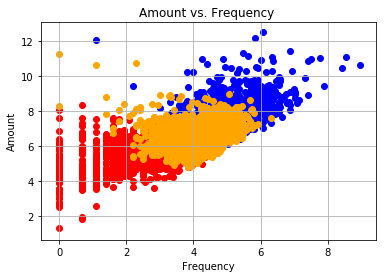

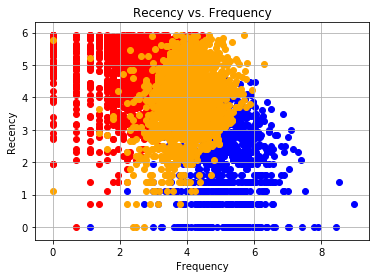

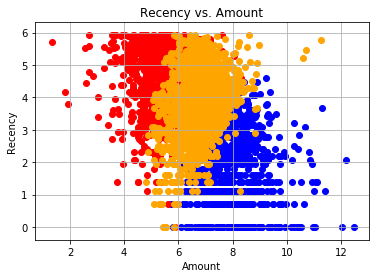

In [62]:
plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 0]['frequency_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 0]['amount_log'],
    c='blue'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 1]['frequency_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 1]['amount_log'],
    c='red'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 2]['frequency_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 2]['amount_log'],
    c='orange'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 3]['frequency_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 3]['amount_log'],
    c='green'
)

plt.title('Amount vs. Frequency ')
plt.xlabel('Frequency')
plt.ylabel('Amount')

plt.grid()
plt.show()


plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 0]['frequency_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 0]['recency_log'],
    c='blue'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 1]['frequency_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 1]['recency_log'],
    c='red'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 2]['frequency_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 2]['recency_log'],
    c='orange'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 3]['frequency_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 3]['recency_log'],
    c='green'
)

plt.title('Recency vs. Frequency')
plt.xlabel('Frequency')
plt.ylabel('Recency')

plt.grid()
plt.show()


plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 0]['amount_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 0]['recency_log'],
    c='blue'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 1]['amount_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 1]['recency_log'],
    c='red'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 2]['amount_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 2]['recency_log'],
    c='orange'
)

plt.scatter(
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 3]['amount_log'], 
    cust_hist.loc[cust_hist['num_cluster3_labels'] == 3]['recency_log'],
    c='green'
)

plt.title('Recency vs. Amount')
plt.xlabel('Amount')
plt.ylabel('Recency')

plt.grid()
plt.show()